In [1]:
import tweepy
import json
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture



In [2]:


KEY = 'IpKfRNx8Z3ol7l7WStt1kNDhK'
KEY_SECRET = 'OQC748btkZZwbghyulCAaTI3Sct1Plh08OTJAqXqlUY8X9UtHy'

TOKEN = '3243768495-vRWhlvKwdhC5Dmp28DuCwTfaegIH2DYShlYFxaZ'
TOKEN_SECRET = 'z79tnTXIJvdAbaTnSpcQwt0JnzfJtnkxsOycxBFgL3OJw'

auth = tweepy.OAuthHandler(KEY, KEY_SECRET)
auth.set_access_token(TOKEN, TOKEN_SECRET)

api = tweepy.API(auth)

tweets = api.search_tweets(q = 'covid', lang = 'nl', count = 100, result_type = 'recent')

ids = [tweet.user.id for tweet in tweets]
    

users_info = api.lookup_users(user_id = [ids])
follower_counts = [info.followers_count for info in users_info]

print(follower_counts)


[75, 574, 261, 1720, 21, 97, 2468, 8156, 2498, 755, 12, 150, 570, 80, 4530, 432, 13, 436, 791, 21424, 43, 1266, 2198, 2837, 14967, 204, 2928, 4341, 23, 59, 3, 342, 43, 529, 747, 707, 143, 1108, 1389, 338, 1054, 253, 11128, 282, 561, 232, 63, 2060, 18939, 226, 1987, 250, 92, 87, 85, 1598, 4, 755, 2858, 483, 342, 40, 928, 117, 398, 327, 66, 912, 1588, 440, 11, 1062, 1890, 726, 6025, 626, 3442, 10666, 1700, 1716, 777, 791, 531, 311, 284, 88, 1659]


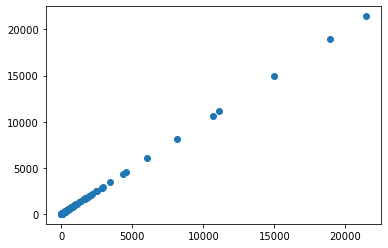

In [3]:
plt.scatter(follower_counts, follower_counts)

 # kmeans

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(follower_counts).reshape(-1,1))

In [6]:
kmeans.labels_

array([0, 0, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0,
       3, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 2, 0, 3, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3])

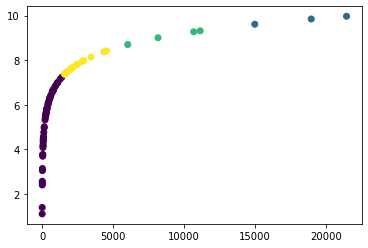

In [7]:
plt.scatter(follower_counts, [math.log(i) for i in follower_counts], c = kmeans.labels_)

In [8]:
kmeans.inertia_

59710028.13530466

C:\Users\emiel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


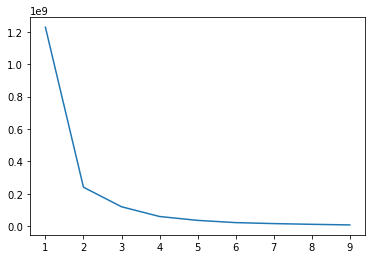

In [9]:
plt.plot(range(1,10), [KMeans(n_clusters=i, random_state=0).fit(np.array(follower_counts).reshape(-1,1)).inertia_ for i in range(1,10)])
    

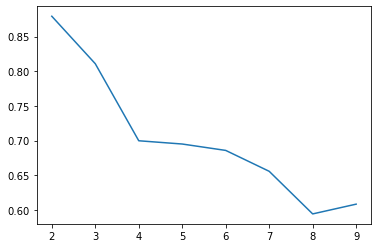

In [10]:
plt.plot(range(2,10), [silhouette_score(np.array(follower_counts).reshape(-1,1),j) for j in [KMeans(n_clusters=i, random_state=0).fit(np.array(follower_counts).reshape(-1,1)).labels_ for i in range(2,10)]]
)

# GMM

In [21]:
gmm = GaussianMixture(n_components=4, random_state=0).fit(np.array(follower_counts).reshape(-1,1))

In [22]:
preds = gmm.predict(np.array(follower_counts).reshape(-1,1))

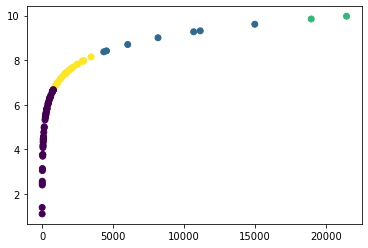

In [23]:
plt.scatter(follower_counts, [math.log(i) for i in follower_counts], c = preds)

In [14]:
gmm.bic(np.array(follower_counts).reshape(-1,1))

1500.351772440375

C:\Users\emiel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


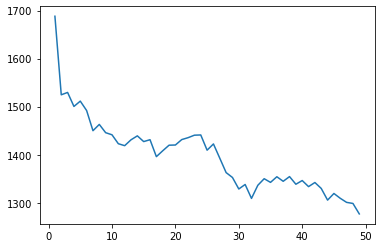

In [15]:
plt.plot(range(1,50), [GaussianMixture(n_components=i, random_state=0).fit(np.array(follower_counts).reshape(-1,1)).bic(np.array(follower_counts).reshape(-1,1)) for i in range(1,50)])

C:\Users\emiel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


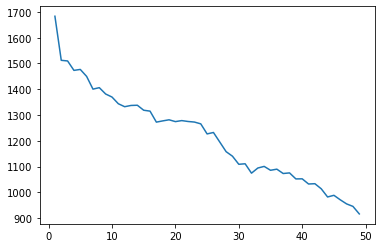

In [16]:
plt.plot(range(1,50), [GaussianMixture(n_components=i, random_state=0).fit(np.array(follower_counts).reshape(-1,1)).aic(np.array(follower_counts).reshape(-1,1)) for i in range(1,50)])

# gbmm

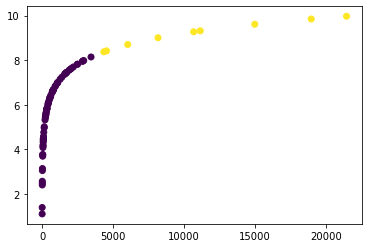

In [31]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(np.array(follower_counts).reshape(-1,1))


plt.scatter(follower_counts, [math.log(i) for i in follower_counts], c  = bgm.predict(np.array(follower_counts).reshape(-1,1)))

In [32]:
np.round(bgm.weights_, 2)


array([0.88, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])